In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot

### Exercise 5.3

In [42]:
RR = pd.read_csv('../data/RajonRondo.csv')
RR.dropna(subset=['G'], inplace =True)
RR = RR.loc[:,['Unnamed: 7', 'AST']]
RR.rename(columns = {'Unnamed: 7' : 'Win', 'AST' : 'AST'}, inplace = True)

In [43]:
def wto1(s):
    if s[0] == 'W' :
        return 1
    else :
        return 0
    
RR['Win'] = RR['Win'].apply(wto1)
RR = RR[['AST', 'Win']]

In [45]:
RR.head()

,AST,Win
0,17,1
1,17,1
2,13,1
3,7,0
7,14,1


In [110]:
ast = RR['AST'].to_numpy().astype(np.int).reshape(-1,1)
win = RR['Win'].to_numpy().astype(np.int)
n = len(win)
lose = np.ones(n)-win
win = win.reshape(-1, 1)
lose = lose.reshape(-1, 1)
result = np.concatenate((win, lose), axis =1)
ast = np.concatenate((ast, np.ones((n, 1))), axis = 1)

In [111]:
logistic_model = sm.GLM(result, ast, family = sm.families.Binomial())
res = logistic_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                   68
Model:                            GLM   Df Residuals:                       66
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35.163
Date:                Sat, 25 Jul 2020   Deviance:                       70.327
Time:                        14:08:57   Pearson chi2:                     63.8
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2810      0.088      3.188      0.0

In [125]:
p3 = res.predict([3, 1])
p24 = res.predict([24, 1])
print("p(3) = %.2f, p(24) = %.2f" %(p3, p24))

p(3) = 0.22, p(24) = 0.99


### Exercise 5.6

In [134]:
Exog = np.array([[1, 66, 1],
                [6, 72, 1],
                [11, 70, 1],
                [16, 75, 1],
                [21, 75, 1],
                [2, 70, 1],
                [7, 73, 1],
                [12, 78, 1],
                [12, 70, 1],
                [22, 76, 1],
                [3, 69, 1],
                [8, 70, 1],
                [13, 67, 1],
                [18, 81, 1],
                [23, 58, 1],
                [4, 68, 1],
                [9, 57, 1],
                [14, 53, 1],
                [19, 76, 1],
                [5, 67, 1],
                [10, 63, 1],
                [15, 67, 1],
                [20, 79, 1]])
Endg = np.array([0, 0, 1, 0, 1,
                1, 0, 0, 0, 0,
                0, 0, 0, 0, 1,
                0, 1, 1, 0,
                0, 1, 0, 0]).reshape(-1, 1)
Y = np.concatenate((Endg, np.ones((23, 1))), axis = 1)

In [135]:
logistic_model = sm.GLM(Y, Exog[:,1:], family = sm.families.Binomial())
res = logistic_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.8204
Date:                Sat, 25 Jul 2020   Deviance:                       9.9367
Time:                        14:21:58   Pearson chi2:                     9.35
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1059      0.062     -1.719      0.0

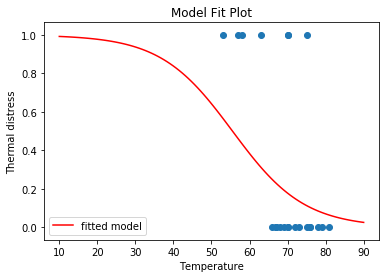

In [153]:
nobs = res.nobs
y = Y[:,0]
yhat = res.mu

myline = np.linspace(10, 90, 100).reshape(-1, 1)
x = np.concatenate((myline, np.ones((100, 1))), axis=1)

fig, ax = plt.subplots()
ax.scatter(Exog[:,1], y)
ax.plot(myline, res.predict(x), color = 'red')

ax.set_title('Model Fit Plot')
ax.set_ylabel('Thermal distress')
ax.set_xlabel('Temperature');
ax.legend(['fitted model'])
plt.show()

In [154]:
res.predict([31, 1])

array([0.9306201])

### Exercise 5.9

#### Cochran-Armitage Trend Test
Cochran은 Pearson statistic($X^2(I)$) 가 다음과 같이 분해됨을 확인했다.

$$X^2(I) = z^2 +X^2(L)$$

따라서 Pearson's independent test 는 Linear trend를 test($X^2(L)$) 한 후, $H_0 : \beta=0$을 test($z^2$) 하는 것과 같음. 여기서 $z^2$을 Cochran-Armitage statistic이라고 하는데, 피어슨 테스트와 비교하자면 $X^2(I)$ 는 자유도가 $I-1$ 인 반면 $z^2$는 자유도가 1이다. 따라서 테스트의 파워가 상당히 달라진다. 문제에서 P-value가 상당히 차이가 나는것도 자유도가 다르기 때문.

In [155]:
X = np.array([[0, 1],
             [1, 1],
             [2, 1],
             [3, 1],
             [4, 1]]
            )
Y = np.array([[1, 11],
             [13, 53],
             [16, 42],
             [15, 27],
             [7, 11]])

In [156]:
logistic_model = sm.GLM(Y, X, family = sm.families.Binomial())
res = logistic_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                    5
Model:                            GLM   Df Residuals:                        3
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.2375
Date:                Sat, 25 Jul 2020   Deviance:                      0.62628
Time:                        14:49:52   Pearson chi2:                    0.579
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3897      0.153      2.543      0.0

### Exercise 5.12

In [230]:
f = open('../data/crab.csv',)
next(f)
dat = []
def preprop(line):
    y = line[-3]
    x = line[:-4].split('  ')
    x.append(y)
    return x

for line in f.readlines():
    dat.append(preprop(line))

f.close()

In [237]:
dat = np.array(dat).astype(np.float)
X = dat[:, :-1]
Y = dat[:,-1]

In [238]:
logistic_model = sm.GLM(Y, X, family = sm.families.Binomial())
res = logistic_model.fit()
print(res.summary())

/Users/jinhwansuk/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


PerfectSeparationError: Perfect separation detected, results not available

In [236]:
X

array([[3.000e+00, 3.000e+00, 2.830e+01, 8.000e+00, 3.050e+03],
       [4.000e+00, 3.000e+00, 2.250e+01, 0.000e+00, 1.550e+03],
       [2.000e+00, 1.000e+00, 2.600e+01, 9.000e+00, 2.300e+03],
       [4.000e+00, 3.000e+00, 2.480e+01, 0.000e+00, 2.100e+03],
       [4.000e+00, 3.000e+00, 2.600e+01, 4.000e+00, 2.600e+03],
       [3.000e+00, 3.000e+00, 2.380e+01, 0.000e+00, 2.100e+03],
       [2.000e+00, 1.000e+00, 2.650e+01, 0.000e+00, 2.350e+03],
       [4.000e+00, 2.000e+00, 2.470e+01, 0.000e+00, 1.900e+03],
       [3.000e+00, 1.000e+00, 2.370e+01, 0.000e+00, 1.950e+03],
       [4.000e+00, 3.000e+00, 2.560e+01, 0.000e+00, 2.150e+03],
       [4.000e+00, 3.000e+00, 2.430e+01, 0.000e+00, 2.150e+03],
       [3.000e+00, 3.000e+00, 2.580e+01, 0.000e+00, 2.650e+03],
       [3.000e+00, 3.000e+00, 2.820e+01, 1.100e+01, 3.050e+03],
       [5.000e+00, 2.000e+00, 2.100e+01, 0.000e+00, 1.850e+03],
       [3.000e+00, 1.000e+00, 2.600e+01, 1.400e+01, 2.300e+03],
       [2.000e+00, 1.000e+00, 2.710e+01,

### Exercise 5.27
By Ex. 5.25

### Exercise 5.30
$$
\begin{aligned}
    P(Y=1|x) &= \frac{P(x|Y=1)P(Y=1)}{P(x|Y=1)P(Y=1)+P(x|Y=0)P(Y=0)}\\
             &= \frac{\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{1}{2\sigma^2}(x-\mu_1)^2)\pi_1}{\frac{1}{\sqrt{2\pi}}\exp(-\frac{1}{2\sigma^2}(x-\mu_1)^2)\pi_1+\frac{1}{\sqrt{2\pi}}\exp(-\frac{1}{2\sigma^2}(x-\mu_0)^2)\pi_0}
\end{aligned}
$$
So, we have
$$logit(P(Y=1|x)) = \beta_1x+\alpha$$

If, $\sigma_0\neq\sigma_1$, the logistic model becomes
$$logit(P(Y=1|x)) = \beta_2x^2+\beta_1x+\alpha$$